<a href="https://colab.research.google.com/github/Archanamayacharya/netflix-content-analysis/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This project involves loading, cleaning, analyzing, and visualizing data from a Netflix
#dataset.

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/netflix1.csv")

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.shape

(8790, 10)

In [ ]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
columns=list(data)
columns

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
(data[columns[0:10]]==0).sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
duplicate_count = data.duplicated().sum()
duplicate_count

np.int64(0)

In [ ]:
import pandas as pd

# ----- 1. Ensure no list-type columns before dropping duplicates -----
for col in data.columns:
    data[col] = data[col].astype(str)

# Drop duplicates
data.drop_duplicates(inplace=True)

# ----- 2. Handle missing values -----
data = data.replace(['', ' ', 'NA', 'NaN', 'nan', 'Null', 'NULL'], pd.NA)

data['director'] = data['director'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Not Rated')

# ----- 3. Convert date_added to datetime -----
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# ----- 4. Clean duration column -----
data[['duration_value', 'duration_unit']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')

# ----- 5. Strip whitespace -----
text_cols = ['type', 'title', 'director', 'country', 'rating', 'listed_in']
for col in text_cols:
    data[col] = data[col].str.strip()

# ----- 6. (Optional) Split multiple values into lists -----
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
data['country'] = data['country'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# ----- Final Cleaned Data -----
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8790 non-null   object        
 1   type            8790 non-null   object        
 2   title           8790 non-null   object        
 3   director        8790 non-null   object        
 4   country         8790 non-null   object        
 5   date_added      8790 non-null   datetime64[ns]
 6   release_year    8790 non-null   object        
 7   rating          8790 non-null   object        
 8   duration        8790 non-null   object        
 9   listed_in       8790 non-null   object        
 10  duration_value  8790 non-null   int64         
 11  duration_unit   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 824.2+ KB
None
  show_id     type                             title         director  \
0      s1    Mo

In [ ]:
# Save cleaned dataset in current working directory
data.to_csv("netflix1_cleaned.csv", index=False)

print("✅ File saved as netflix1_cleaned.csv in your working directory")

✅ File saved as netflix1_cleaned.csv in your working directory


In [ ]:
from google.colab import files
files.download("netflix1_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-6955233.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


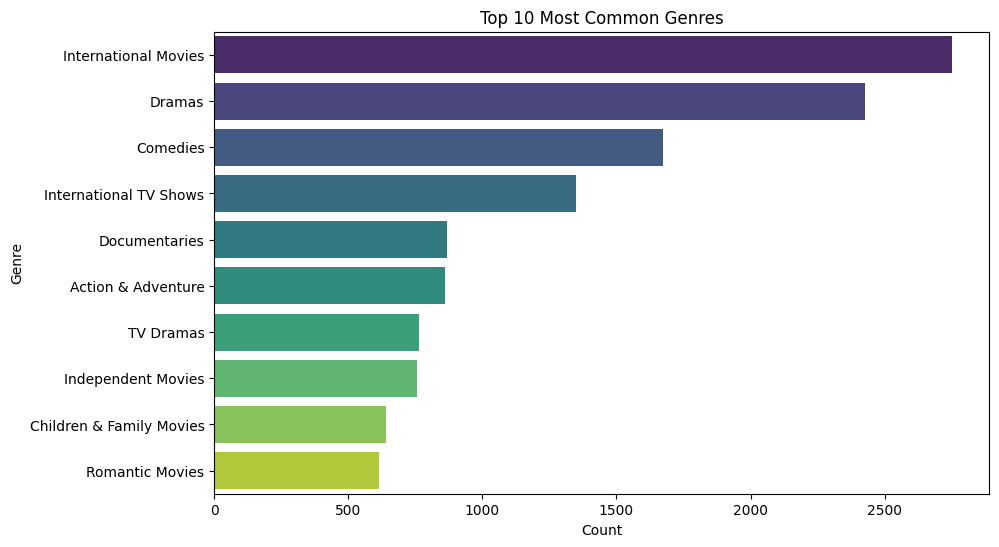

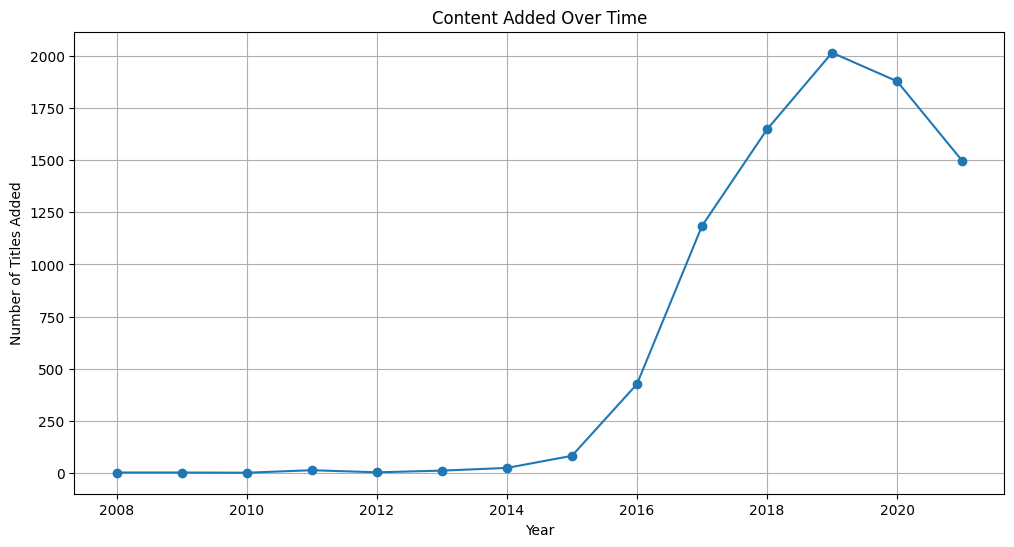

/tmp/ipython-input-6955233.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")


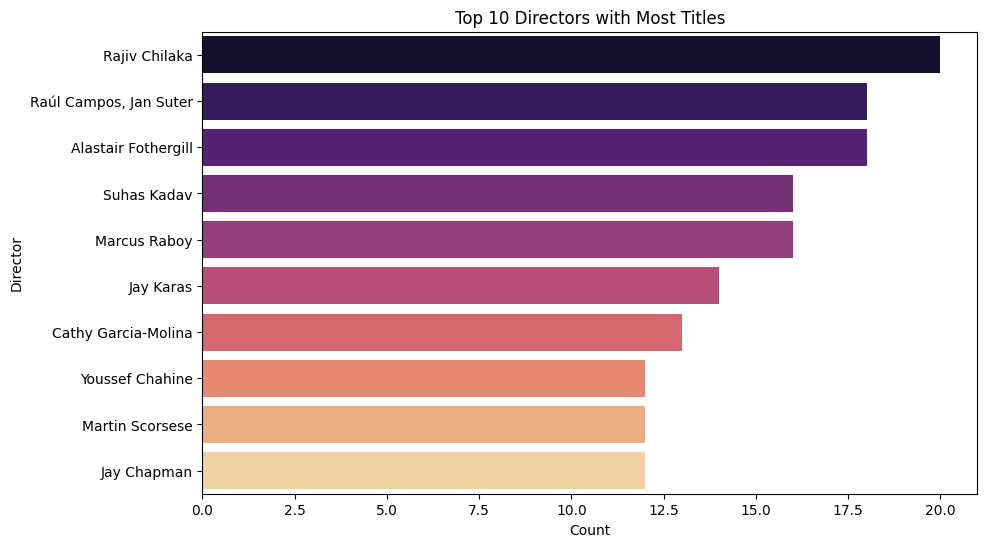

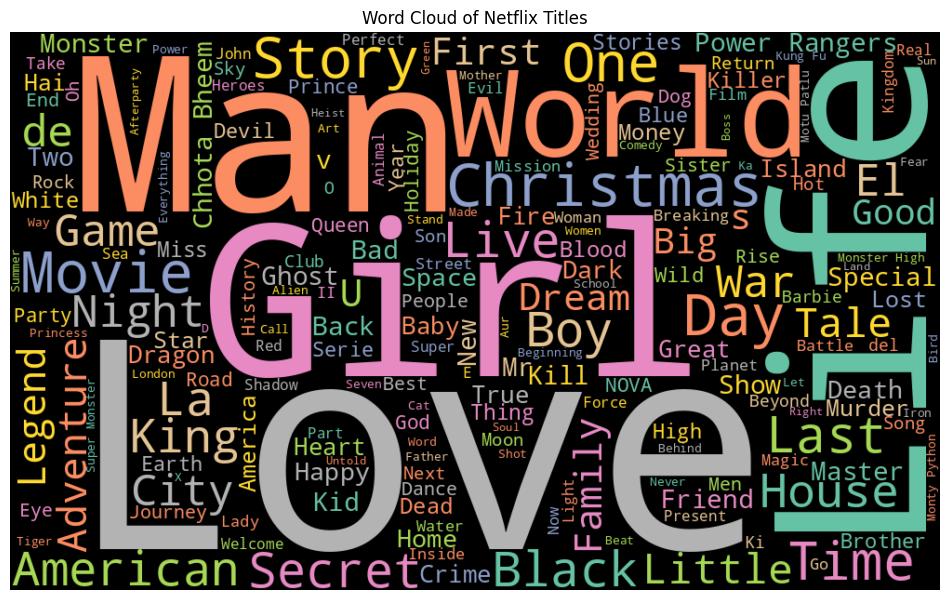

/tmp/ipython-input-6955233.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette="coolwarm")


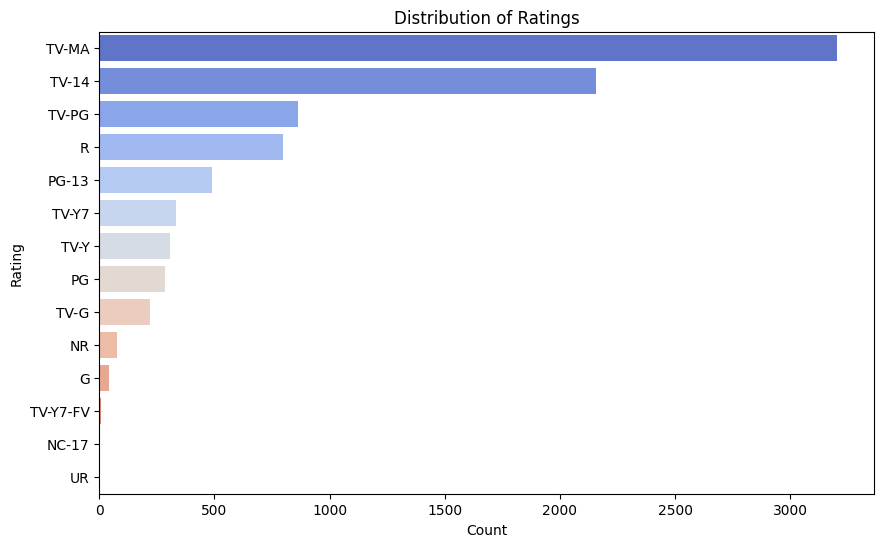

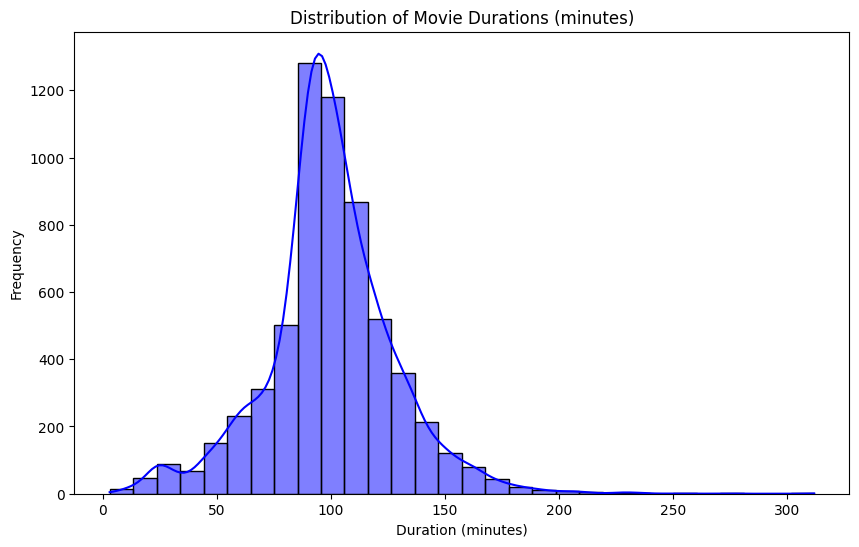

/tmp/ipython-input-6955233.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=shows['duration_value'], palette="Set1")


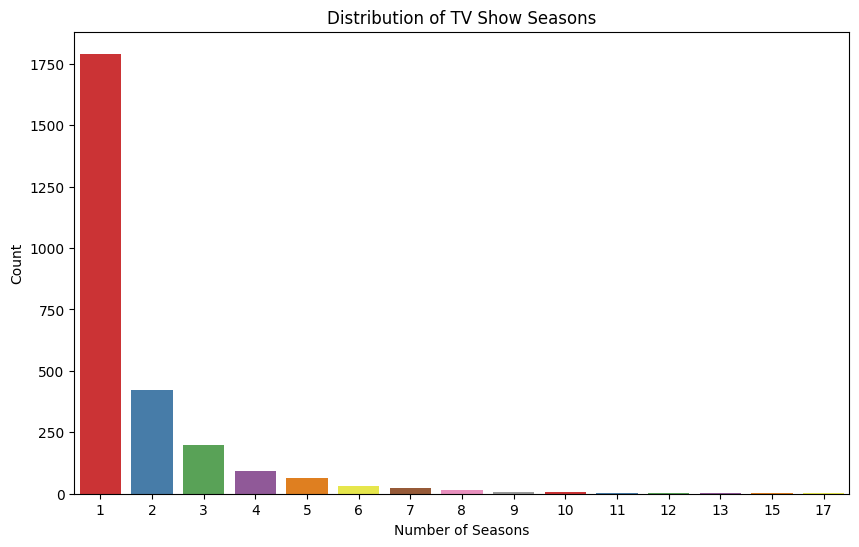

/tmp/ipython-input-6955233.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="plasma")


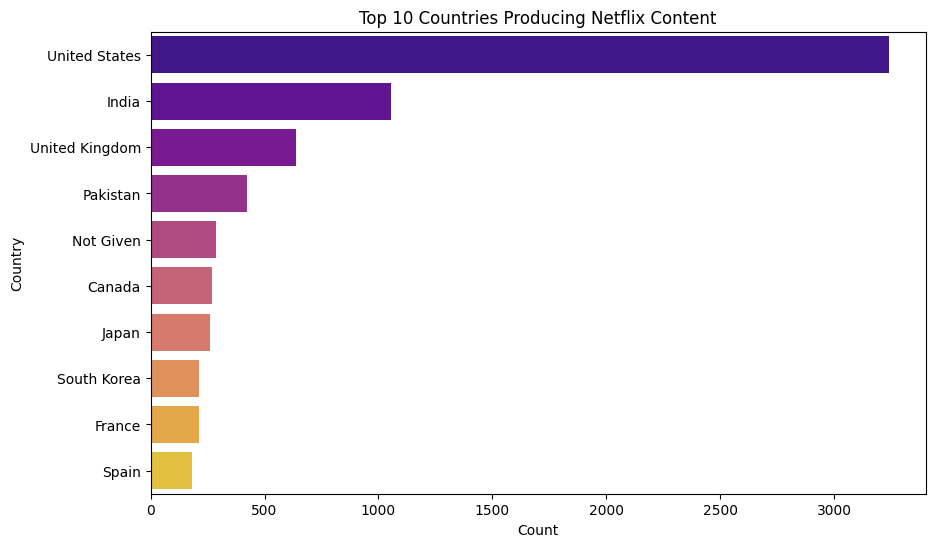

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
file_path = "/content/netflix1_cleaned.csv"
df = pd.read_csv(file_path)

# -------------------------------
# 1. Most Common Genres
# -------------------------------
genres = df['listed_in'].str.replace(r"[\[\]'\"]", "", regex=True).str.split(",")
all_genres = [g.strip() for sublist in genres.dropna() for g in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# -------------------------------
# 2. Content Added Over Time
# -------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
titles_per_year.plot(kind='line', marker='o')
plt.title("Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

# -------------------------------
# 3. Top 10 Directors with Most Titles
# -------------------------------
directors = df['director'].replace("Not Given", pd.NA).dropna()
top_directors = directors.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

# -------------------------------
# 4. Word Cloud of Movie Titles
# -------------------------------
text = " ".join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=600, background_color="black", colormap="Set2").generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Netflix Titles")
plt.show()

# -------------------------------
# 5. Ratings Distribution
# -------------------------------
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# -------------------------------
# 6. Duration Analysis (Movies vs TV Shows)
# -------------------------------
movies = df[df['type']=="Movie"]
shows = df[df['type']=="TV Show"]

plt.figure(figsize=(10,6))
sns.histplot(movies['duration_value'], bins=30, kde=True, color="blue")
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x=shows['duration_value'], palette="Set1")
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 7. Top 10 Countries Producing Content
# -------------------------------
countries = df['country'].str.replace(r"[\[\]'\"]", "", regex=True).str.split(",")
all_countries = [c.strip() for sublist in countries.dropna() for c in sublist]
country_counts = pd.Series(all_countries).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="plasma")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

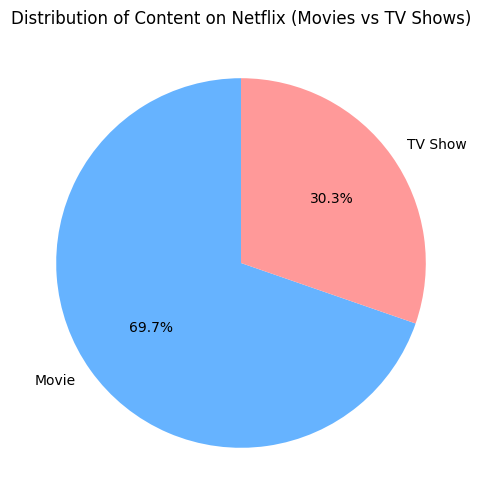

In [ ]:
import matplotlib.pyplot as plt

# Count distribution of TV Shows vs Movies
content_dist = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(content_dist,
        labels=content_dist.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#66b3ff","#ff9999"])
plt.title("Distribution of Content on Netflix (Movies vs TV Shows)")
plt.show()

In [ ]:
import pandas as pd

# Assuming df is already loaded
# -------------------------------
# FEATURE ENGINEERING
# -------------------------------

# 1. Number of Genres per Title
df['num_genres'] = df['listed_in'].str.replace(r"[\[\]'\"]", "", regex=True).str.split(",").apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

# 2. Unified Duration Columns (Minutes for Movies / Seasons for Shows)
df['duration_in_minutes'] = df.apply(
    lambda row: row['duration_value'] if row['duration_unit'] == 'min' else None, axis=1
)
df['num_seasons'] = df.apply(
    lambda row: row['duration_value'] if row['duration_unit'] == 'Season' else None, axis=1
)

# 3. Date Features
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

# 4. Binary Flags
df['is_tv_show'] = (df['type'] == "TV Show").astype(int)
df['is_kids_content'] = df['listed_in'].str.contains("Children|Family|Kids", case=False, na=False).astype(int)

# -------------------------------
# Check results
# -------------------------------
print(df[['title', 'type', 'listed_in', 'num_genres',
          'duration_in_minutes', 'num_seasons',
          'year_added', 'month_added', 'is_tv_show', 'is_kids_content']].head())

                              title     type  \
0              Dick Johnson Is Dead    Movie   
1                         Ganglands  TV Show   
2                     Midnight Mass  TV Show   
3  Confessions of an Invisible Girl    Movie   
4                           Sankofa    Movie   

                                           listed_in  num_genres  \
0                              ["['Documentaries']"]           1   
1  ["['Crime TV Shows'", "'International TV Shows...           3   
2  ["['TV Dramas'", "'TV Horror'", "'TV Mysteries...           3   
3     ["['Children & Family Movies'", "'Comedies']"]           2   
4  ["['Dramas'", "'Independent Movies'", "'Intern...           3   

   duration_in_minutes  num_seasons  year_added  month_added  is_tv_show  \
0                 90.0          NaN        2021            9           0   
1                  NaN          1.0        2021            9           1   
2                  NaN          1.0        2021            9           1  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target
features = ['num_genres', 'duration_in_minutes', 'year_added', 'month_added', 'is_kids_content']
X = df[features].fillna(0)
y = df['is_tv_show']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1237    1]
 [   0  520]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Prepare genre text data
df['genre_clean'] = df['listed_in'].str.replace(r"[\[\]'\"]", "", regex=True)

# Convert genres into numerical representation
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genre_clean'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def recommend(title, n=5):
    if title not in df['title'].values:
        return f"Title '{title}' not found in dataset."
    idx = df.index[df['title'] == title][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, _ in sim_scores[1:n+1]]
    return df['title'].iloc[top_indices]

# Example usage:
print("Recommendations for 'Sankofa':")
print(recommend("Sankofa", n=5))

Recommendations for 'Sankofa':
54               Ankahi Kahaniya
280    LSD: Love, Sex Aur Dhokha
382         La diosa del asfalto
509              Eyes of a Thief
510       Pomegranates and Myrrh
Name: title, dtype: object


In [ ]:
df.to_csv("netflix_cleaned_features.csv", index=False)

In [ ]:
from google.colab import files
df.to_csv("netflix_cleaned_features.csv", index=False)
files.download("netflix_cleaned_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>